In [11]:
import json
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import NullFormatter
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib as mpl
import numpy as np
import networkx as nx
import scipy as sp
from scipy.optimize import leastsq
import sys
import random
from scipy import stats
datapath = "F:\\master\\myWork\\18familiarStrangers\\data\\"
functionPath = "F:\\master\\myWork\\18familiarStrangers\\"
sys.path.append(functionPath)
import temporalNetworkConstructor as ctn

In [3]:
%qtconsole

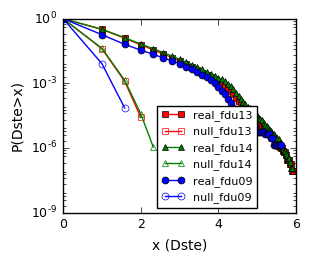

In [4]:
## real_null Dste
data = json.load(open(datapath+"\\drawing\\null_real.json"))
datasets = ["fdu2013","fdu2014","fdu2009"]
colors = ["r","g","b"]
markers_null = ["-2","-4","-1","-3"]
markers_real = ["-s","-^","-o","-D"]
fig = plt.figure(figsize = (3,2.5))
ax = plt.subplot(111)
ci = 0
x = [0,2,4,6]
for dataset in datasets:
    datasetlabel = dataset.replace("20","")
    real_ex = data[dataset]["real"]["e_x"]
    real_ey = data[dataset]["real"]["e_y"]
    null_ex = data[dataset]["null"]["e_x"]
    null_ey = data[dataset]["null"]["e_y"]
    ax.semilogy(real_ex, real_ey, markers_real[ci],color=colors[ci], label="real_"+datasetlabel, markersize=5, linewidth=1)
    ax.semilogy(null_ex, null_ey, markers_real[ci],color=colors[ci], markersize=5, label="null_"+datasetlabel,linewidth=1,fillstyle='none')
    ci += 1
axbox = ax.get_position()
ax.legend(loc=(axbox.x0+0.28, axbox.y0-0.10),fontsize=8)
ax.set_yticks([1e-9,1e-6,1e-3,1])
ax.set_xticks(x)
ax.set_xlabel("x (Dste)")
ax.set_ylabel("P(Dste>x)")
axis = ax.xaxis
for label in axis.get_ticklabels():
    label.set_fontsize(9)
axis = ax.yaxis
for label in axis.get_ticklabels():
    label.set_fontsize(9)
plt.show()
    

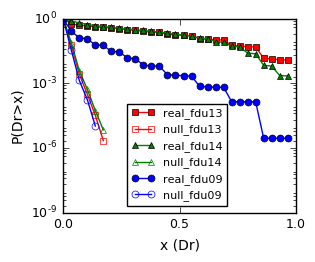

In [8]:
## real_null_Dr
data = json.load(open(datapath+"\\drawing\\null_real.json"))
datasets = ["fdu2013","fdu2014","fdu2009"]
colors = ["r","g","b","c"]
markers_null = ["-2","-4","-1","-3"]
markers_real = ["-s","-^","-o","-D"]
fig = plt.figure(figsize = (3,2.5))
ax = plt.subplot(111)
ci = 0
for dataset in datasets:
    datasetlabel = dataset.replace("20","")
    real_ex = data[dataset]["real"]["r_x"]
    real_ey = data[dataset]["real"]["r_y"]
    null_ex = data[dataset]["null"]["r_x"]
    null_ey = data[dataset]["null"]["r_y"]
    ax.semilogy(real_ex, real_ey, markers_real[ci],color=colors[ci], label="real_"+datasetlabel, markersize=5, linewidth=1)
    ax.semilogy(null_ex, null_ey, markers_real[ci],color=colors[ci], markersize=5, label="null_"+datasetlabel, linewidth=1,fillstyle='none')
    ci += 1
axbox = ax.get_position()
ax.legend(loc=(axbox.x0+0.15, axbox.y0-0.09),fontsize=8)
ax.set_yticks([1e-9,1e-6,1e-3,1])
ax.set_xticks([0,0.5,1])
ax.set_xlabel("x (Dr)")
ax.set_ylabel("P(Dr>x)")
axis = ax.xaxis
for label in axis.get_ticklabels():
    label.set_fontsize(9)
axis = ax.yaxis
for label in axis.get_ticklabels():
    label.set_fontsize(9)
plt.show()

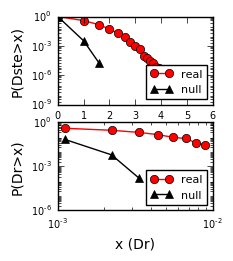

In [6]:
# ## real_null_Dr (format 2)
method1 = 'v1_1'
method2 = 'v1_1'
N = 5000
dataset = "usc2006"
result = {}
result[dataset] = {}
result[dataset]["null"] = {}
result[dataset]["real"] = {}
eList = []
rList = []
fr = open(datapath + "%s\\basic\\dyad_e_r_t_l_w_all_%s.txt" % (dataset,dataset))
line = fr.readline().replace("\n","")
while line:
    e,r = map(float, line.split("\t")[1:3])
    eList.append(round(e, 3))
    rList.append(round(r, 7))
    line = fr.readline().replace("\n","")
fr.close()
eList0 = []
rList0 = []
fr = open(datapath + "%s\\nullmodel\\dyad_e_r_null_%s_%s.txt" % (dataset, N, method1))
line = fr.readline().replace("\n","")
while line:
    e,r = map(float, line.split("\t"))
    eList0.append(round(e, 3))
    line = fr.readline().replace("\n","")
fr.close()
fr = open(datapath + "%s\\nullmodel\\dyad_e_r_null_%s_%s.txt" % (dataset, N, method2))
line = fr.readline().replace("\n","")
while line:
    e,r = map(float, line.split("\t"))
    rList0.append(round(r, 7))
    line = fr.readline().replace("\n","")
fr.close()

xmin = min(eList)
xmax = max(eList)
ymin = min(rList)
ymax = max(rList)

plt.figure(figsize=(2,2.5))
x_bins0 = np.round(np.log2(np.array(range(1,64))),3)
y_bins0 = np.linspace(0,0.01,10)
weights1 = np.ones_like(eList)/float(len(eList)) 
weights2 = np.ones_like(rList)/float(len(rList)) 
sub1 = plt.subplot(2,1,1)
sub2 = plt.subplot(2,1,2)
nx,binsx = np.histogram(eList,bins=x_bins0,weights = weights1)
xx = list(nx)
xx.reverse()
xx = list(np.cumsum(xx))
xx.reverse()
sub1.semilogy(binsx[:-1],xx,'-ro',label="real")

# axHisty.set_xticklabels(axHisty.xaxis.get_ticklabels())
ny,binsy = np.histogram(rList,bins=y_bins0,weights = weights2)
yy = list(ny)
yy.reverse()
yy = list(np.cumsum(yy))
yy.reverse()
sub2.loglog(binsy[:-1],yy,'-ro',label="real")

result[dataset]["real"]["e_x"] = list(binsx[:-1])
result[dataset]["real"]["e_y"] = list(xx)
result[dataset]["real"]["r_x"] = list(binsy[:-1])
result[dataset]["real"]["r_y"] = list(yy)

# null
weights10 = np.ones_like(eList0)/float(len(eList0)) 
weights20 = np.ones_like(rList0)/float(len(rList0)) 

nx0,binsx0 = np.histogram(eList0,bins=x_bins0,weights = weights10)
xx = list(nx0)
xx.reverse()
xx = list(np.cumsum(xx))
xx.reverse()
sub1.semilogy(binsx0[:-1],xx,'-k^',label="null")

# axHisty.set_xticklabels(axHisty.xaxis.get_ticklabels())
ny0,binsy0 = np.histogram(rList0,bins = y_bins0,weights = weights20)
yy = list(ny0)
yy.reverse()
yy = list(np.cumsum(yy))
yy.reverse()
sub2.loglog(binsy0[:-1],yy,'-k^',label="null")

result[dataset]["null"]["e_x"] = list(binsx0[:-1])
result[dataset]["null"]["e_y"] = list(xx)
result[dataset]["null"]["r_x"] = list(binsy0[:-1])
result[dataset]["null"]["r_y"] = list(yy)

sub1.legend(fontsize=8)
sub1.legend(loc="lower right",fontsize=8)
sub1.set_yticks([1e-9,1e-6,1e-3,1])
sub1.set_xlabel("x (Dste)")
sub1.set_ylabel("P(Dste>x)")
axis1 = sub1.xaxis
for label in axis1.get_ticklabels():
    label.set_fontsize(7)
axis1 = sub1.yaxis
for label in axis1.get_ticklabels():
    label.set_fontsize(7)
sub2.legend(fontsize=8)
sub2.legend(loc="lower right",fontsize=8)
sub2.set_xlabel("x (Dr)")
sub2.set_ylabel("P(Dr>x)")
sub2.set_yticks([1e-6,1e-3,1])
axis2 = sub2.xaxis
for label in axis2.get_ticklabels():
    label.set_fontsize(7)
axis2 = sub2.yaxis
for label in axis2.get_ticklabels():
    label.set_fontsize(7)
plt.show()

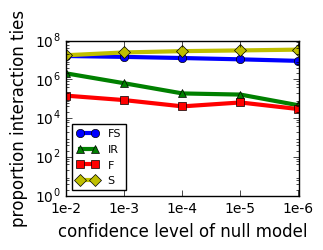

In [7]:
## type proportion vs p0
dataset = "sjtuecard"
typeProportionVSp0 = json.load(open(datapath + "%s\\classification\\typeProportionVSp0.json"%dataset))
num = 5
fs_p = typeProportionVSp0["fsp"][-1*num:]
s_p = typeProportionVSp0["sp"][-1*num:]
f_p = typeProportionVSp0["fp"][-1*num:]
ir_p = typeProportionVSp0["irp"][-1*num:]
x = range(len(fs_p))
plt.figure(figsize=(3,2))
plt.semilogy(x,fs_p,'-bo',label='FS', linewidth=3)
plt.semilogy(x,ir_p,'-g^',label='IR', linewidth=3)
plt.semilogy(x,f_p,'-rs',label='F', linewidth=3)
plt.semilogy(x, s_p,'-yD',label='S', linewidth=3)
plt.yticks([1,1e2,1e4,1e6,1e8])
plt.ylim(1,1e8)
plt.xticks([0,1,2,3,4],["1e-2","1e-3", "1e-4", "1e-5", "1e-6"])
plt.xlim(0,4.01)
plt.xlabel("confidence level of null model", fontsize=12)
plt.ylabel("proportion interaction ties", fontsize=12)
plt.legend(fontsize=8, loc="lower left")
plt.show()

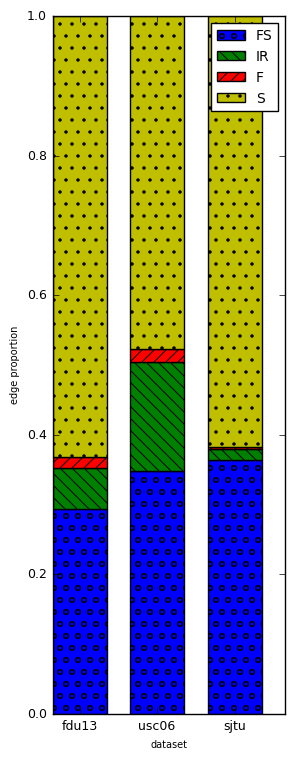

In [9]:
# edge proportion in datasets when p=0.001
data = json.load(open(datapath+"\\drawing\\type_proportion2.json"))
datasets = ["fdu2013", "usc2006", "sjtuecard"]
datasetsname = ["fdu13","usc06", "sjtu"]
datasetN = len(datasets)
result = [[]]*datasetN
for i in range(len(datasets)):
    datai = data[datasets[i]]
    result[i]=list(np.array([0, datai["fs"], datai["ir"], datai["f"], datai["s"]])/ 
              float(np.array([datai["fs"], datai["ir"], datai["f"], datai["s"]]).sum()))
result = np.array(zip(*result))
colors = ["b","g","r","y"]
types = ["fs","ir","f","s"]
typename = ["FS","IR","F","S"]
hatchs = ["o","\\\\","//","."]
ind = [1,2,3]
width = 0.7
fig = plt.figure(figsize = (3,9))
ax = plt.subplot(111)
for i in range(1,len(result)):
    bo = result[0]
    for j in range(1,i):
        bo = bo+result[j]
    plt.bar(np.array(ind), result[i], width, bottom = bo, color=colors[i-1], label=typename[i-1],edgecolor='black', hatch=hatchs[i-1])
plt.xticks(np.array(ind)+width/2, datasetsname,fontsize=9)
plt.yticks(fontsize=9)
plt.xlim(1,4)
plt.legend(fontsize=10)
plt.xlabel("dataset",fontsize=7)
plt.ylabel("edge proportion", fontsize=7)
plt.show()

In [13]:
## ego-network (in gephi)
dataset = "sjtuecard"
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":1.585,"r0":0.002},
     "sjtuecard":{"e0":2.322,"r0":0.008}}
e0 = er[dataset]["e0"]
r0 = er[dataset]["r0"]

# dyadType = {}
# fr = open(datapath+"%s\\classification\\dyad_type2_all_%s_%.3f_%.3f.txt" % (dataset, dataset, e0, r0))
# line = fr.readline().replace("\n","")
# count = 0
# while line:
#     count += 1
#     if count%1000000 == 0:
#         print count
#     k,v = line.split("\t")
#     dyadType[k] = v
#     line = fr.readline().replace("\n","")
# fr.close()

timeWname = "1day"
weights = {"fs":2,"ir":20,"f":31,"s":3}
g = nx.Graph()
for ti in range(29,32,1):
    colors = {"fs":"blue","ir":"green","f":"red","s":"cyan"}
    fr = open(datapath+"%s\\temporalNetwork\\temporalNetwork_%s\\%s.txt"%(dataset,timeWname,ti))
    es = fr.read().splitlines()
    for e in es:
        n1,n2,v = e.split("\t")
        g.add_edge(n1,n2,types=v, weight=weights[v])
    fr.close()


In [123]:
tmp = []
for i in range(len(g)):
    selectnode = g.nodes()[i] # 52:126, 70:89
    nodes = g.neighbors(selectnode)
    nodes.append(selectnode)
    if len(nodes)>50and len(nodes)<60:
        tmp.append(i)
        print i

51
84
95
103
188
204
276
309
410
413
456
493
555
591
733
742
804
873
934
1006
1096
1241
1270
1279
1288
1359
1360
1369
1382
1388
1431
1530
1687
1780
1787
1877
1911
1961
1976
1991
1999
2025
2105
2164
2214
2243
2412
2414
2549
2640
2689
2830
2857
2883
2903
2907
2961
2963
2967
2971
3004
3168
3206
3252
3302
3336
3379
3390
3404
3439
3580
3627
3686
3712
3726
3766
3773
3795
3926
3929
3968
3988
4147
4184
4210
4253
4460
4463
4465
4514
4557
4610
4631
4774
4864
4876
4924
4970
4996
5092
5113
5171
5181
5199
5206
5249
5267
5351
5361
5427
5461
5467
5493
5510
5544
5604
5679
5687
5714
5765
5769
5793
5823
5840
5861
5950
5986
6012
6013
6137
6182
6516
6618
6823
6865
6929
7026
7037
7102
7117
7172
7306
7517
7564
7648
7664
7689
7750
7967
7969
8076
8222
8381
8413
8443
8478
8519
8584
8591
8596
8605
8634
8731
8804
8816
8824
8883
8905
8913
8939
8984
9000
9022
9039
9171
9246
9328
9329
9657
9658
9701
9743
9762
9875
9920
9979
10005
10084
10094
10131
10153
10169
10262
10266
10299
10313
10383
10475
10600
10654
10759
10

In [139]:
# a = []
# count = 0
# for i in tmp:
#     count += 1
#     print count,"/",len(tmp)
#     selectnode1 = g.nodes()[i] # 71,1046
#     nodes1 = set(g.neighbors(selectnode1))
#     nodes1.add(selectnode1)
#     selectnode2 = g.nodes()[i] # 71,1046
#     nodes2 = set(g.neighbors(selectnode2))
#     nodes2.add(selectnode2)
#     nodes = list(nodes1|nodes2)
#     # nodes = g.nodes()
#     H = nx.Graph()
#     dyadType = {"fs":0,"ir":0,"f":0,"s":0}
#     weights = {"fs":2,"ir":20,"f":31,"s":3}
#     for e in g.edges():
#         n1 = e[0]
#         n2 = e[1]
#         if n1 in nodes and n2 in nodes:
#             v = g.get_edge_data(n1,n2)["types"]
#             dyadType[v] += 1
#             H.add_edge(n1,n2, types=v, weight=weights[v])
#     a.append([i,dyadType["ir"]/float(len(H)*(len(H)-1)/2)])
# #     nx.write_gexf(H, datapath+"drawing\\ege_net_%s.gexf"%dataset)



# selectnode1 = g.nodes()[1006] # 71,1046
# nodes1 = set(g.neighbors(selectnode1))
# nodes1.add(selectnode1)
# selectnode2 = g.nodes()[411] # 71,1046
# nodes2 = set(g.neighbors(selectnode2))
# nodes2.add(selectnode2)
# nodes = list(nodes1|nodes2)
# print len(nodes1&nodes2)/float(len(nodes))
# print len(nodes)
H = nx.Graph()
dyadType = {"fs":0,"ir":0,"f":0,"s":0}
weights = {"fs":2,"ir":20,"f":31,"s":3}
for e in g.edges():
    n1 = e[0]
    n2 = e[1]
    if n1 in nodes and n2 in nodes:
        v = g.get_edge_data(n1,n2)["types"]
        dyadType[v] += 1
        H.add_edge(n1,n2, types=v, weight=weights[v])
nx.write_gexf(H, datapath+"drawing\\ege_net_%s2.gexf"%dataset)

# a = []
# fr = open(datapath+"drawing\\validnodes1_%s.txt"%dataset)
# vn = set([])
# line = fr.readline().replace("\n","")
# count = 0
# while line:
#     count += 1
#     if count%1000000 == 0:
#         print count
#     vn.add(line)
#     line = fr.readline().replace("\n","")
# fr.close()
# count = 0
# for i in tmp:
#     count += 1
#     print count,"/",len(tmp)
#     selectnode2 = g.nodes()[i] # 71,1046
#     nodes2 = set(g.neighbors(selectnode2))
#     nodes2.add(selectnode2)
#     nodes = vn|nodes2
#     H = nx.Graph()
#     dyadType = {"fs":0,"ir":0,"f":0,"s":0}
#     weights = {"fs":2,"ir":20,"f":31,"s":3}
#     a1 = 0
#     a2 = 0
#     for e in g.edges():
#         n1 = e[0]
#         n2 = e[1]
#         if n1 in nodes and n2 in nodes:
#             if n1 in vn and n2 in vn:
#                 a1+=1
#             elif n1 in nodes2 and n2 in nodes2:   
#                 dyadType["ir"]+=1
#                 a1+=1
#             else:
#                 a2+=1
#     if a2 == 0:
#         a.append([i,a1,dyadType["ir"]/(len(nodes2)*(len(nodes2)-1)/2.0),1])
#     else:
#         a.append([i,a1/float(a2),dyadType["ir"]/(len(nodes2)*(len(nodes2)-1)/2.0)])

In [121]:
dataset = "sjtuecard"
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":1.585,"r0":0.002},
     "sjtuecard":{"e0":2.322,"r0":0.008}}
e0 = er[dataset]["e0"]
r0 = er[dataset]["r0"]

# H = nx.Graph()
# fr = open(datapath+"drawing\\validedges_%s.txt"%dataset)
# line = fr.readline().replace("\n","")
# count = 0
# while line:
#     count += 1
#     if count%1000000 == 0:
#         print count
#     n1,n2,v = line.split("\t")
#     if g.has_edge(n1,n2):
#         H.add_edge(n1,n2, types=v, weight=weights[v])
#     line = fr.readline().replace("\n","")
# fr.close()
# nx.write_gexf(H, datapath+"drawing\\ege_net_%s2.gexf"%dataset)


# H = nx.Graph()
fr = open(datapath+"drawing\\validnodes2_%s.txt"%dataset)
vn = set([])
line = fr.readline().replace("\n","")
count = 0
while line:
    count += 1
    if count%1000000 == 0:
        print count
    vn.add(line)
    line = fr.readline().replace("\n","")
fr.close()
for e in g.edges():
    n1 = e[0]
    n2 = e[1]
    if n1 in vn and n2 in vn:
        v = g.get_edge_data(n1,n2)["types"]
        dyadType[v] += 1
        H.add_edge(n1,n2, types=v, weight=weights[v],aa="2")
# nx.write_gexf(H, datapath+"drawing\\ege_net_%s2.gexf"%dataset)

In [11]:
## ego-network (in gephi)
dataset = "sjtuecard"
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":1.585,"r0":0.002},
     "sjtuecard":{"e0":2.322,"r0":0.008}}
e0 = er[dataset]["e0"]
r0 = er[dataset]["r0"]
nodeset = set(nodes)
dyadType = {"fs":0,"ir":0,"f":0,"s":0}
weights = {"fs":2,"ir":20,"f":31,"s":3}
H = nx.Graph()
fr = open(datapath+"%s\\classification\\dyad_type2_all_%s_%.3f_%.3f.txt" % (dataset, dataset, e0, r0))
line = fr.readline().replace("\n","")
count = 0
while line:
    count += 1
    if count%1000000 == 0:
        print count
    k,v = line.split("\t")
    n1,n2 = k.split("&")
    if n1 in nodeset and n2 in nodeset and g.has_edge(n1,n2):
        if v == "fs":
#             print n1,n2
            if random.random()<1:
                H.add_edge(n1,n2, types=v, weight=weights[v])
        else:
            H.add_edge(n1,n2, types=v, weight=weights[v])
        dyadType[v] += 1
    line = fr.readline().replace("\n","")
fr.close()
nx.write_gexf(H, datapath+"drawing\\ege_net_%s.gexf"%dataset)

1000000
2000000
3000000
4000000
5000000
6000000


KeyboardInterrupt: 

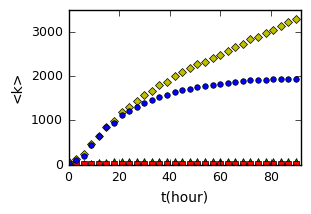

In [14]:
## aggregate degree distribution (evolution)
dataset = "sjtuecard"
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":1.585,"r0":0.002},
     "sjtuecard":{"e0":2.322,"r0":0.008}}
e0 = er[dataset]["e0"]
r0 = er[dataset]["r0"]
types = ["ir","f","s","fs"]
colors = ["g","r","y","b"]
markers = ["^","s","D","o"]
plt.figure(figsize=(3,2))
plt.subplot(111)
ci=0
for typei in types:
    k = json.load(open(datapath+"%s\\K\\aggreK_evolution2_%.3f_%.3f.json" % (dataset, e0, r0),'r'))[typei]
    k = sorted(k.iteritems(),key=lambda d:int(d[0]))
    a = [int(x[0]) for x in k[0:]]
    b = [x[1][0] for x in k[0:]]
    p = sp.polyfit(a,b,4)
    x = np.array(range(0,1840))
    fx = sp.polyval(p,x)
    plt.plot(a[0:len(a):3],b[0:len(b):3],markers[ci],color=colors[ci],label=typei, markersize=4)
#     plt.plot(x,fx,'-',color="black")
    ci += 1
plt.xlabel("t(hour)", fontsize=10)
plt.ylabel("<k>",fontsize=10)
# plt.xticks([0,360,730, 1080, 1440],["0","20","40","60","80"], fontsize=9)
plt.xticks([0,20,40, 60, 80],["0","20","40","60","80"], fontsize=9)
plt.yticks([0,1000,2000,3000,4000],fontsize=9)
# plt.title("degree distribution of each type",fontsize=16)
plt.xlim(0,92)
plt.ylim(0,3500)
# axbox = ax.get_position()
# plt.legend(loc=(axbox.x0+0.65, axbox.y0+0.02),fontsize=8)
# plt.legend(loc="upper right",fontsize=8)
# axis = ax.xaxis
# for label in axis.get_ticklabels():
#     label.set_fontsize(9)
# axis = ax.yaxis
# for label in axis.get_ticklabels():
#     label.set_fontsize(9)
plt.show()

k=85.798254 + 146.138166
k=12.208981 + 14.426624
k=3282.849204 + 850.060844
k=1931.553101 + 879.047581


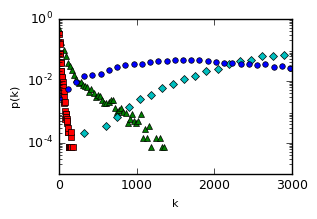

In [15]:
## degree distribbution
dataset = "sjtuecard"
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":1.585,"r0":0.002},
     "sjtuecard":{"e0":2.322,"r0":0.008}}
e0 = er[dataset]["e0"]
r0 = er[dataset]["r0"]
types = [["ir"],["f"],["s"],["fs"]]
colors = ["g","r","c","b"]
markers = ["^","s","D","o"]
# types = [["ir","fs","f","s"]]
fig = plt.figure(figsize=(3,2))
ax = plt.subplot(111)
ci=0
for typei in types:
    fr = open(datapath+"%s\\K\\%.3f_%.3f_%s_2.json" % (dataset, e0, r0, "+".join(typei)),'r')
    k = [x[1] for x in json.load(fr)]
    fr.close()
    weights = np.ones_like(k)/float(len(k))
    n,bins = np.histogram(k, bins=50, weights=weights)
    plt.semilogy(bins[:-1],n, markers[ci], label="+".join(typei), markersize=4, color = colors[ci])
    print "k=%f + %f"%(np.mean(np.array(k)), np.std(np.array(k)))
    ci += 1
plt.xlabel("k", fontsize=8)
plt.ylabel("p(k)",fontsize=8)
plt.xticks([0,1000, 2000,3000])
plt.xlim(0,3000)
plt.ylim(1e-5,1)
plt.yticks([1e-4,1e-2,1])
# plt.legend(fontsize=7)
axis = ax.xaxis
for label in axis.get_ticklabels():
    label.set_fontsize(9)
axis = ax.yaxis
for label in axis.get_ticklabels():
    label.set_fontsize(9)
plt.show()

1000000
2000000


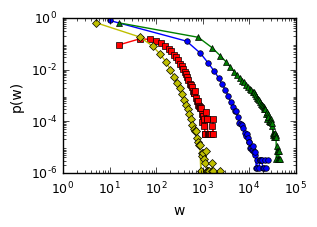

In [16]:
## duration distribution
dataset = "usc2006"
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":1.585,"r0":0.002}}
e0 = er[dataset]["e0"]
r0 = er[dataset]["r0"]
fr = open(datapath + "%s\\classification\\dyad_type2_all_%s_%.3f_%.3f.txt" % (dataset, dataset, e0, r0))
line = fr.readline().replace("\n","")

dyadtype = {}
count = 0
while line:
    id, type = line.split("\t")
    dyadtype[id] = type
    line = fr.readline().replace("\n","")
fr.close()

fr = open(datapath + "%s\\basic\\dyad_e_r_t_l_w_all_%s.txt" %(dataset,dataset),'r')
edgeweight = {"fs":[],"ir":[],"s":[],"f":[]}
linei = fr.readline().replace("\n","")
count = 0
while linei:
    count += 1
    if count %1000000 == 0:
        print count
    splits = linei.split("\t")
    if not dyadtype.get(splits[0]):
        linei = fr.readline().replace("\n","")
        continue
    edgeweight[dyadtype.get(splits[0])].append(int(splits[5]))
    linei = fr.readline().replace("\n","")
fr.close()

types = ["fs","ir","f","s"]
colors = ["b","g","r","y"]
markers = ["-o","-^","-s","-D"]
fig = plt.figure(figsize=(3,2))
ax = plt.subplot(111)
ci=0
for typei in types:
    k = edgeweight[typei]
    weights = np.ones_like(k)/float(len(k))
    n,bins = np.histogram(k, bins=60, weights=weights)
    ax.loglog(bins[:-1],n,markers[ci], label=typei, color=colors[ci],markersize=4)
    ci += 1
ax.set_xlabel("w", fontsize=10)
# ax.set_xlim(0,5000)
# ax.set_ylim(1e-5,1)
ax.set_yticks([1e-6,1e-4,1e-2,1])
ax.set_ylabel("p(w)",fontsize=10)
# plt.legend(fontsize=8)
axis = ax.xaxis
for label in axis.get_ticklabels():
    label.set_fontsize(9)
axis = ax.yaxis
for label in axis.get_ticklabels():
    label.set_fontsize(9)
plt.show()

In [1]:
## frequency distribution 2
dataset = "fdu2013"
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":2.322,"r0":0.0119012}}
e0 = er[dataset]["e0"]
r0 = er[dataset]["r0"]
fr = open(datapath + "%s\\classification\\dyad_type2_all_%s_%.3f_%.3f.txt" % (dataset, dataset, e0, r0))
line = fr.readline().replace("\n","")

dyadtype = {}
count = 0
while line:
    id, type = line.split("\t")
    dyadtype[id] = type
    line = fr.readline().replace("\n","")
fr.close()

fr = open(datapath + "%s\\basic\\dyad_e_r_t_l_w_all_%s.txt" %(dataset,dataset),'r')
edgeweight = {"fs":[],"ir":[],"s":[],"f":[]}
linei = fr.readline().replace("\n","")
count = 0
while linei:
    count += 1
    if count %1000000 == 0:
        print count
    splits = linei.split("\t")
    if not dyadtype.get(splits[0]):
        linei = fr.readline().replace("\n","")
        continue
    edgeweight[dyadtype.get(splits[0])].append(int(splits[3]))
    linei = fr.readline().replace("\n","")
fr.close()

types = ["ir","f","s","fs"]
colors = ["g","r","c","b"]
markers = ["^","s","D","o"]
fig = plt.figure(figsize=(2,1.6))
ax = plt.subplot(111)
ci=0
for typei in types:
    k = edgeweight[typei]
    weights = np.ones_like(k)/float(len(k))
    n,bins = np.histogram(k, bins=20, weights=weights)
    ax.loglog(bins[:-1],n,markers[ci], label=typei, color=colors[ci],markersize=5)
    ci += 1
ax.set_xlabel("w", fontsize=10)
# ax.set_xlim(0,5000)
# ax.set_ylim(1e-5,1)
ax.set_yticks([1e-6,1e-3,1])
ax.set_xticks([1,10,1e2,1e3])
ax.set_ylabel("p(f)",fontsize=10)
# plt.legend(fontsize=8)
axis = ax.xaxis
for label in axis.get_ticklabels():
    label.set_fontsize(7)
axis = ax.yaxis
for label in axis.get_ticklabels():
    label.set_fontsize(7)
plt.show()

NameError: name 'datapath' is not defined

In [4]:
## ICT -- for fs and ir
datasets = ["fdu2013"]
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":2.322,"r0":0.0119012}}
colors = ["r","g","k","c"]
markers = ["-s","-^","-o","-D"]
# ict = {"fdu2013":{"fs":[],"ir":[],"s":[],"f":[]},
#        "fdu2014":{"fs":[],"ir":[],"s":[],"f":[]},
#        "fdu2009":{"fs":[],"ir":[],"s":[],"f":[]},
#        "usc2006":{"fs":[],"ir":[],"s":[],"f":[]}}
# for dataset in datasets:
#     e0 = er[dataset]["e0"]
#     r0 = er[dataset]["r0"]
#     fr = open(datapath+"%s\\ICT\\%.3f_%.3f_slot.txt"%(dataset, e0, r0))
#     lines = fr.read().splitlines()
#     count = 0
#     for e in lines:
#         count += 1
#         if count%1000000==0:
#             print count
#         splits = e.split("\t")
#         ict[dataset][splits[1]].append(int(splits[0]))
#     fr.close()

typei = "s"
fig = plt.figure(figsize=(3,1.2))
ax = plt.subplot(111)
ci = 2
for dataset in datasets:
    series = ict[dataset][typei]
    weight = np.ones_like(series)/float(len(series))
    [n,bins] = np.histogram(series, bins = 80, weights = weight)
    plt.semilogy(bins[1:],n,markers[ci],label=typei, color=colors[ci],markersize=3)
    ci += 1
labels = ["10","20","30","40","50","60","70","80","90"]
plt.xticks(range(240,2160,240), labels)
plt.xlabel("t (days)")
plt.xlim(0,90*24+1)
plt.ylim(1e-7,1)
plt.yticks([1e-6,1e-4,1e-2,1], fontsize=9)
plt.xticks(fontsize=9)
#     plt.legend(loc="lower right")
plt.ylabel("percentage (%)")
plt.show()

In [55]:
## ICT -- for f
typei = "f"
fig = plt.figure(figsize=(3,2))
ax = plt.subplot(111)
ci = 0
for dataset in datasets:
    series = ict[dataset][typei]
    weight = np.ones_like(series)/float(len(series))
    [n,bins] = np.histogram(series, bins = 84, weights = weight)
    xx = list(n)
#     xx.reverse()   # ccdf
#     xx = list(np.cumsum(xx))
#     xx.reverse()
    plt.loglog(bins[1:],xx,markers[ci],label=dataset,color=colors[ci], markersize=4)
    ci += 1
x = [24,168,336,672,1344,2016]
y = [4*(xi**-1.19) for xi in x]
plt.loglog(x,y,"k-")
labels = ['1','7','14','28','56','84']
plt.xticks([24,168,336,672,1344,2016], labels)
# labels = ['7','14','28','35','42','49','56','63']
# plt.xticks(range(168,1512,168), labels)
plt.xlabel("t (days)")
plt.xlim(0,2000)
plt.ylim(1e-6,1)
plt.xlabel("t (day)", fontsize=8)
plt.ylabel("p(t)",fontsize=8)
plt.legend(fontsize=8,loc="lower left")
axis = ax.xaxis
for label in axis.get_ticklabels():
    label.set_fontsize(9)
axis = ax.yaxis
for label in axis.get_ticklabels():
    label.set_fontsize(9)
plt.show()

In [30]:
## ICT -- within  a day
datasets = ["sjtuecard"]
types = ["fs","ir","f"]
ttname = "withinaday"
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":1.585,"r0":0.0023},
      "sjtuecard":{"e0":2.322,"r0":0.008}}
colors = ["-ob","-sr","-^g","-y"]
markers = ["o","-s","-^","-D"]
ict = {"fdu2013":{"fs":[],"ir":[],"s":[],"f":[]},
       "fdu2014":{"fs":[],"ir":[],"s":[],"f":[]},
       "fdu2009":{"fs":[],"ir":[],"s":[],"f":[]},
       "usc2006":{"fs":[],"ir":[],"s":[],"f":[]},
       "sjtuecard":{"fs":[],"ir":[],"s":[],"f":[]}}
for dataset in datasets:
    e0 = er[dataset]["e0"]
    r0 = er[dataset]["r0"]
    fr = open(datapath+"%s\\ICT\\%.3f_%.3f_%s.txt"%(dataset, e0, r0, ttname))
    lines = fr.read().splitlines()
    count = 0
    for e in lines:
        count += 1
        if count%1000000==0:
            print count
        splits = e.split("\t")
        typei = splits[1]
        if typei in types:
            ict[dataset][splits[1]].append(int(splits[0]))
    fr.close()

fig = plt.figure(figsize=(3,0.8)) #正文0.8
ax = plt.subplot(111)
ci = 0
for dataset in datasets:
    for typei in types:
        series = ict[dataset][typei]
        weight = np.ones_like(series)/float(len(series))
        [n,bins] = np.histogram(series, bins =200, weights = weight)
        plt.loglog(bins[:-1],n,colors[ci],label=dataset, markersize=3)
        ci += 1
        
# x = [10,100,200,500,1000,1400]
# y = [100*(xi**-1.53) for xi in x] #fdu09 1.62 fdu13 1.58, fdu14 1.56, usc 1.53
# plt.loglog(x,y,"k-")
# x = [10,100,200,500,1000,1400]
# y = [100*(xi**-2.35) for xi in x] #fdu09 2.26 fdu13 2.35, fdu14 2.28, usc 1.53
# plt.loglog(x,y,"k-")


plt.ylim(1e-7,1)
plt.yticks([1e-6,1e-4,1e-2,1])
plt.xlim(10,2000)
plt.xticks([10,100,1000])
plt.xlabel("t (day)", fontsize=9)
plt.ylabel("p(t)",fontsize=9)
# plt.legend(fontsize=7,loc="lower left")
axis = ax.xaxis
for label in axis.get_ticklabels():
    label.set_fontsize(9)
axis = ax.yaxis
for label in axis.get_ticklabels():
    label.set_fontsize(9)
plt.show()

1000000
2000000
3000000
4000000
5000000


In [13]:
# ictwithaday = json.load(open(datapath+"%s\\ICT\\drawict.json"%dataset))
# # ictwithaday = {}
# ictwithaday["f"] = [list(n),list(bins)]
# tofile = json.dumps(ictwithaday)
# fw = open(datapath+"%s\\ICT\\drawict.json"%dataset,"w")
# fw.write(tofile)
# fw.close()

fig = plt.figure(figsize=(3,1))
types = ["fs","ir","f"]
colors = ["-b","-r","-g","-y"]
ci=0
for typei in types:
    ci +=1
    x = ictwithaday[typei][0]
    y = ictwithaday[typei][1]
    plt.loglog(y[1:],x, colors[ci-1], markersize=5, linewidth=3)
x = [10,100,200,500,1000,1400]
y = [100*(xi**-1.5) for xi in x] #fs:2000,-2.3, ir,f:100,-1.5
plt.loglog(x,y,"k-")
plt.ylim(1e-7,1)
plt.yticks([1e-6,1e-4,1e-2,1])
plt.xlim(10,2000)
plt.xlabel("t (day)", fontsize=8)
plt.ylabel("p(t)",fontsize=8)
# plt.legend(fontsize=7,loc="lower left")
axis = ax.xaxis
for label in axis.get_ticklabels():
    label.set_fontsize(9)
axis = ax.yaxis
for label in axis.get_ticklabels():
    label.set_fontsize(9)
plt.show()

In [18]:
## Dissimilarity coefficient for degree ranks
dataset = "sjtuecard"
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":1.585,"r0":0.0023},
      "sjtuecard":{"e0":2.322,"r0":0.008}}
e0 = er[dataset]["e0"]
r0 = er[dataset]["r0"]
types = ["fs","ir","f","s"]
c = {"fs":"-bo","ir":"-g^","f":"-rs","s":"-yD"}
degree_rank = json.load(open(datapath+"%s\\K\\rankK_evolution.json"%dataset))
nodelist = [str(int(x)) for x in json.load(open(datapath+"%s\\basic\\userlist_%s.json"%(dataset,dataset)))]
spearman_rank = {}
for typei in types:
    spearman_rank[typei] = []
initial_rank = {}
for typei in types:
    initial_rank[typei] = [degree_rank[str(0)][typei].get(x,0) for x in nodelist]
for ti in range(37, 90+1, 7):
    for typei in types:
        temprank = [degree_rank[str(ti)][typei].get(x,0) for x in nodelist]
        r = stats.spearmanr(initial_rank[typei], temprank)
        spearman_rank[typei].append(r[0])

plt.figure(figsize=(3,2))
x = range(30, 90+1, 7)
x = np.array(x)
for typei in types:
    y = [1]+spearman_rank[typei]
    yy = [(1-yi*yi) for yi in y]
    plt.plot(x, yy, c[typei], label=typei,markersize=4, linewidth=2)
plt.legend(loc="upper left")
plt.xticks([20,40,60,80], fontsize=9)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0],fontsize=9)
plt.ylim(0,1)
plt.legend(fontsize=7,loc="upper left")
plt.show()

In [18]:
## ecnounter frequency f evolution
dataset = "fdu2009"
fig = plt.figure(figsize = (3,2))
ax = plt.subplot(111)
avrgf = json.load(open(datapath+"%s\\averageEdgeWeight\\avrgf_evolution.json"%dataset))
types = ["fs","ir","f","s"]
c = {"fs":"-bo","ir":"-g^","f":"-rs","s":"-cD"}
x = range(504, 1512+1, 126)
xx = np.array(x)/18
for typei in types:
    y = [avrgf[str(xi)][typei] for xi in x]
#     if typei == "ir":
#         y[0] = y[0]-1.2
#         y[1] = y[1]-1.0
#     if typei == "f":
#         y[0] = y[0]-1.2
#         y[1] = y[1]-0.5
    ax.plot(xx, y, c[typei], label=typei, markersize=6, linewidth=2)
ax.set_xlabel("t (hour)")
ax.set_xticks([20,40,60,80])
ax.set_ylim(0,12)
plt.legend(fontsize=7,loc="upper left")
axis = ax.xaxis
for label in axis.get_ticklabels():
    label.set_fontsize(9)
axis = ax.yaxis
for label in axis.get_ticklabels():
    label.set_fontsize(9)
plt.show()

In [33]:
## public activity vs dfs
datasets = ["fdu2013","fdu2014"]
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":2.322,"r0":0.0119012}}
N = {"fdu2013":10146,"fdu2014":9028}
colors = ["g","r"]
markers= ["o","^"]
fig = plt.figure(figsize=(3,2))
ax = plt.subplot(111)
ci = 0
for dataset in datasets:
    e0 = er[dataset]["e0"]
    r0 = er[dataset]["r0"]
    data = json.load(open(datapath+"%s\\K\\activity_fs_%.3f_%.3f.json"%(dataset, e0, r0)))
    interval = 0.005
    minnum = 30
    x = {}
    for ui in data:
        xi = int(data[ui]["a"]/N[dataset]/interval)*interval
        if x.get(xi):
            x[xi].append(data[ui]["fs"])
        else:
            x[xi] = [data[ui]["fs"]]
    xx = {}
    stdx = {}
    for xi in x:
        if len(x[xi])>= minnum:
            xx[xi] = np.mean(np.array(x[xi]))
            stdx[xi] = np.std(np.array(x[xi]))
    a = sorted(xx.keys())
    b = []
    e = []
    for ki in a:
        b.append(xx[ki])
        e.append(stdx[ki])
    ax.errorbar(a, b, yerr=e, fmt=markers[ci],color=colors[ci],markersize=5,label=dataset)
#     ax.plot(a,b, markers[ci], color=colors[ci],markersize=5,label=dataset)
    ci += 1
ax.set_xlim(0,0.07)
ax.set_ylim(0,2500)
# ax.set_xticks([2,4,6,8,10])
ax.set_xlabel("a", fontsize=8)
ax.set_ylabel("d(fs)",fontsize=8)
plt.legend(fontsize=7,loc="upper left")
axis = ax.xaxis
for label in axis.get_ticklabels():
    label.set_fontsize(6)
axis = ax.yaxis
for label in axis.get_ticklabels():
    label.set_fontsize(6)
plt.show()

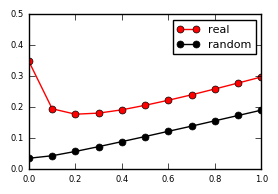

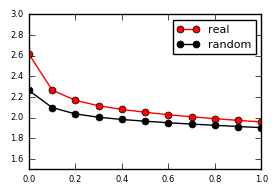

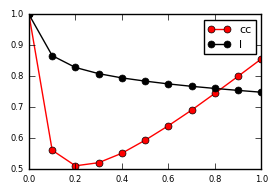

In [17]:
##  clustering, path length, fs proportion
dataset = "fdu2013"
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":2.322,"r0":0.0119012}}
e0 = er[dataset]["e0"]
r0 = er[dataset]["r0"]
data = json.load(open(datapath+"%s\\clustering\\c_l_fsp_%.3f_%.3f.json"%(dataset, e0,r0)))
cc = []
cc_random = []
l = []
l_random = []
cc_r = []
l_r =[]
x = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for fsp in x:
    cc.append(data[str(fsp)]["cc"])
    cc_random.append(data[str(fsp)]["cc_random"])
    cc_r.append(data[str(fsp)]["cc"]/data[str(0.0)]["cc"])
    l.append(data[str(fsp)]["l"])
    l_random.append(data[str(fsp)]["l_random"])
    l_r.append(data[str(fsp)]["l"]/data[str(0.0)]["l"])
fig = plt.figure(figsize=(3,2))
ax = plt.subplot(111)
ax.plot(x,cc,"-ro",markersize=5,label="real")
ax.plot(x,cc_random,"-ko",markersize=5,label="random")
ax.set_ylim(0,0.5)
ax.legend(loc="upper right", fontsize=8)
axis = ax.xaxis
for label in axis.get_ticklabels():
    label.set_fontsize(6)
axis = ax.yaxis
for label in axis.get_ticklabels():
    label.set_fontsize(6)

fig = plt.figure(figsize=(3,2))
ax = plt.subplot(111)
ax.plot(x,l,"-ro",markersize=5,label="real")
ax.plot(x,l_random,"-ko",markersize=5,label="random")
ax.set_ylim(1.5,3)
ax.legend(loc="upper right", fontsize=8)
axis = ax.xaxis
for label in axis.get_ticklabels():
    label.set_fontsize(6)
axis = ax.yaxis
for label in axis.get_ticklabels():
    label.set_fontsize(6)
    
fig = plt.figure(figsize=(3,2))
ax = plt.subplot(111)
ax.plot(x,cc_r,"-ro",markersize=5,label="cc")
ax.plot(x,l_r,"-ko",markersize=5,label="l")
ax.set_ylim(0.5,1)
ax.legend(loc="upper right", fontsize=8)
axis = ax.xaxis
for label in axis.get_ticklabels():
    label.set_fontsize(6)
axis = ax.yaxis
for label in axis.get_ticklabels():
    label.set_fontsize(6)
plt.show()

In [2]:
import pymongo
database = "realitymining"
conn = pymongo.Connection('localhost', 27017)
db = conn[database]
alldata = db.dyaddata.find({},snapshot = True) # modify the dataset
g = nx.Graph()
for di in alldata:
    n1,n2 = di["dyadID"].split("&")
    g.add_edge(n1,n2)
print nx.average_clustering(g)
print nx.average_shortest_path_length(g)
conn.close()

0.735026755798
1.47877403389


In [24]:
## average interaction location number and distribution
dataset = "gowalla"
l = []
fr = open(datapath+"%s\\basic\\dyad_e_r_t_l_w_all_%s.txt"%(dataset,dataset))
line = fr.readline().replace("\n","")
count = 0
while line:
    count += 1
    if count%1000000==0:
        print count
    li = int(line.split("\t")[4])
    l.append(li)
    line = fr.readline().replace("\n","")
fr.close()
print max(l)
weights = np.ones_like(l)/float(len(l))
n,bins = np.histogram(l, bins=20,weights=weights)
plt.loglog(bins[:-1],n,'-o')
plt.show()

364


In [20]:
l.sort()
print l[-1], l[-2]

23 12
